# Bathroom to Bedroom Ratio
In this note book we investigate whether the number of bathrooms per bedroom provides any additional predictive power beyond the number of bedrooms.

In [1]:
import RegressionAnalysis
import numpy as np
from scipy import stats
ra = RegressionAnalysis.RegressionAnalysis()

In [2]:
df = ra.load_data().query('bedrooms < 10 and 10*5 < price < 2*10**6')

In [3]:
bedBath = df[['bedrooms', 'bathrooms']].copy()
bedBath['bath_per_bed'] = df['bathrooms'] / df['bedrooms']
bedBath['log_price'] = df['price'].apply(np.log10)
bedBath.head()

,bedrooms,bathrooms,bath_per_bed,log_price
0,3,1.00,0.333333,5.346157
1,3,2.25,0.750000,5.730782
2,2,1.00,0.500000,5.255273
3,4,3.00,0.750000,5.781037
4,3,2.00,0.666667,5.707570


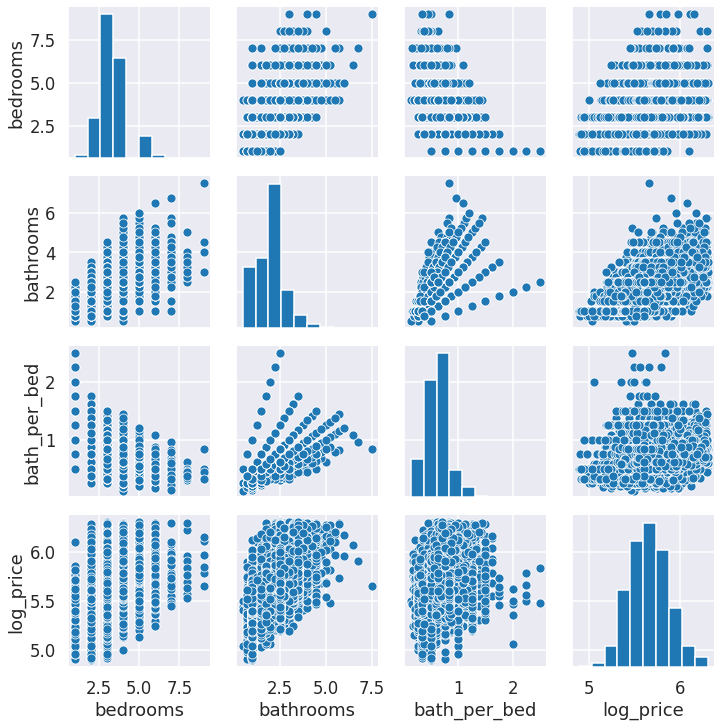

In [4]:
ra.make_pair_plot(bedBath)

In [5]:
X1 = bedBath.drop(['log_price', 'bathrooms'], axis=1)
y1 = bedBath['log_price']
model1 = ra.fit_model(X1,y1)
y_hat1 = ra.predict_target(X1, model1)
res1 = ra.compute_residuals(y1, y_hat1)
model1.score(X1, y1)

0.2590511347549287

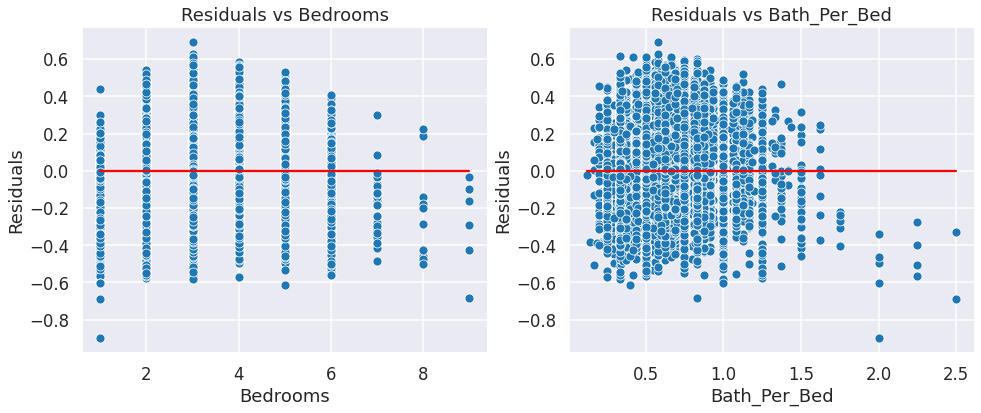

In [6]:
ra.plot_residuals_against_inputs(X1,res1)

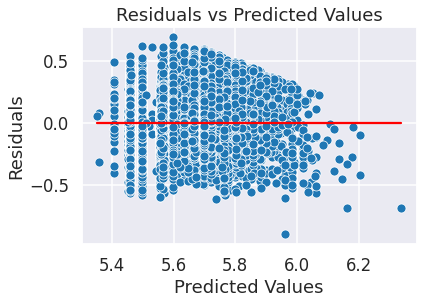

In [7]:
ra.plot_residuals_against_prediction(y_hat1, res1)

In [8]:
ra.compute_vif(X1)

{'bedrooms': 5.16, 'bath_per_bed': 5.16}

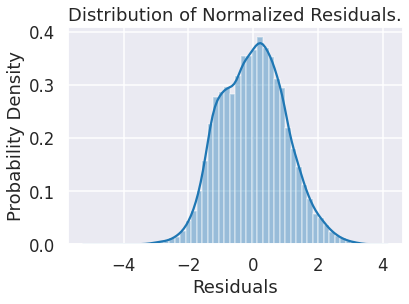

In [9]:
ra.plot_residuals_distribution(res1)

We reject the null hypothesis that our residuals are normally distributed at the alpha =0.05 level.


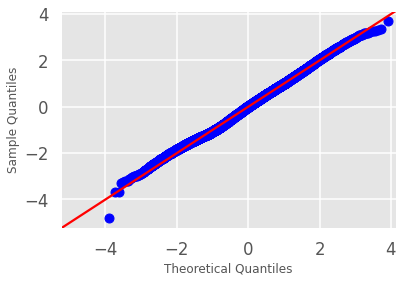

In [10]:
ra.plot_residuals_normal_qq(res1)

In [11]:
X2 = bedBath.drop(['log_price','bath_per_bed'], axis=1)
y2 = bedBath['log_price']
model2 = ra.fit_model(X2,y2)
y_hat2 = ra.predict_target(X2, model2)
res2 = ra.compute_residuals(y2, y_hat2)
model2.score(X2, y2)

0.27906377828557727

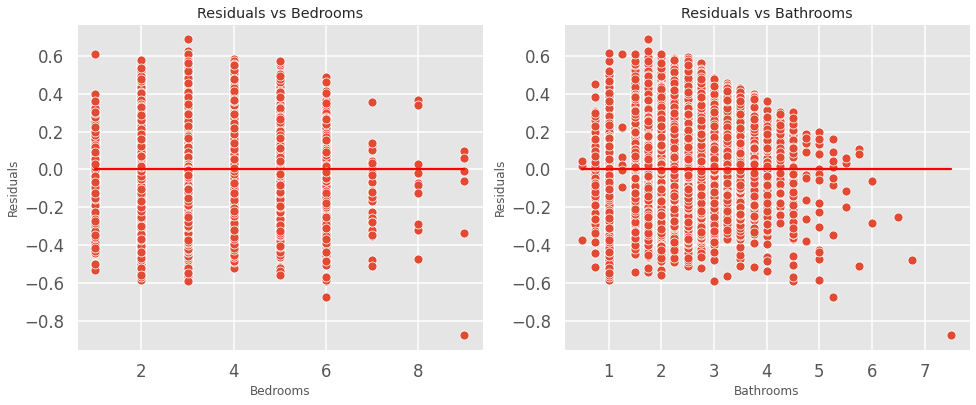

In [12]:
ra.plot_residuals_against_inputs(X2, res2)

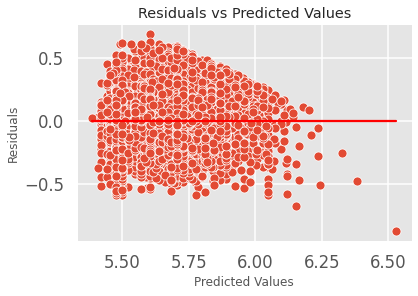

In [13]:
ra.plot_residuals_against_prediction(y_hat2, res2)

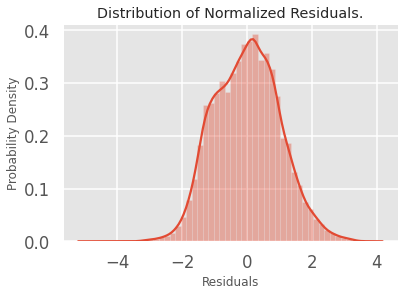

In [14]:
ra.plot_residuals_distribution(res2)

We reject the null hypothesis that our residuals are normally distributed at the alpha =0.05 level.


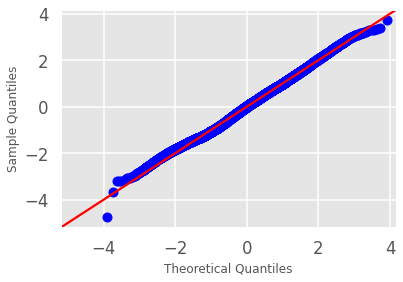

In [15]:
ra.plot_residuals_normal_qq(res2)

In [16]:
ra.compute_vif(X2)

{'bedrooms': 11.5, 'bathrooms': 11.5}

In [17]:
X3 = bedBath.drop(['log_price','bath_per_bed', 'bathrooms'], axis=1)
y3 = bedBath['log_price']
model3 = ra.fit_model(X3,y3)
y_hat3 = ra.predict_target(X3, model3)
res3 = ra.compute_residuals(y3, y_hat3)
model3.score(X3, y3)

0.11480783811718165

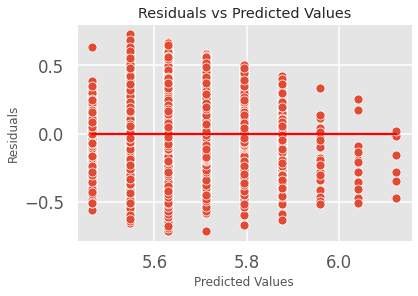

In [18]:
ra.plot_residuals_against_prediction(y_hat3, res3)

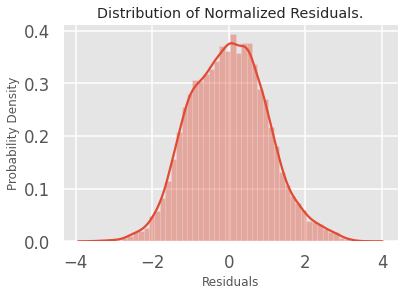

In [19]:
ra.plot_residuals_distribution(res3)

We reject the null hypothesis that our residuals are normally distributed at the alpha =0.05 level.


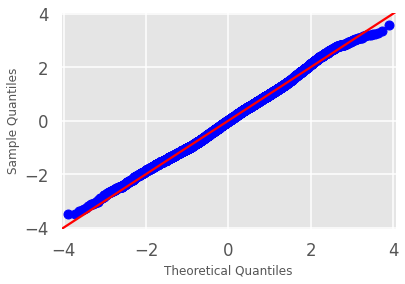

In [20]:
ra.plot_residuals_normal_qq(res3)

## Conclusion 
The number of baths per bedroom reduces vif substantially compared to model 2 and outperforms model 3 in terms of r2